In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [69]:
x_size_cum  = [0, 3.4, 7.8, 11.9, 15, 18, 21, 23] # number of parameters until 
# Number of parameters *unquantized*
#x_size_cum = [23 - x for x in x_size_cum]
experiments = [0,  25,  33,   42, 45, 48, 51, 53]
experiments.reverse()
mapping = dict(zip(experiments, x_size_cum))

In [70]:
df = pd.read_csv('qat-data.csv')

In [71]:
df.head()

,Experiment,V100_TTA,V100_TRACEMALLOC,V100_TF_MEM
0,53,1574.098135,615788072,5914434983
1,51,2049.356562,615477571,6050077440
2,48,4206.123628,615471135,6054697728
3,45,8202.690574,615474963,6056963840
4,42,8566.486342,615478513,6053175040


In [72]:
# Replace experiment numbers with numbrs of parameters quantized
df['Experiment'] = df['Experiment'].map(mapping)
df.rename(columns={'Experiment': 'no_parameters_quantized'}, inplace=True)

In [73]:
df.head()

,no_parameters_quantized,V100_TTA,V100_TRACEMALLOC,V100_TF_MEM
0,0.0,1574.098135,615788072,5914434983
1,3.4,2049.356562,615477571,6050077440
2,7.8,4206.123628,615471135,6054697728
3,11.9,8202.690574,615474963,6056963840
4,15.0,8566.486342,615478513,6053175040


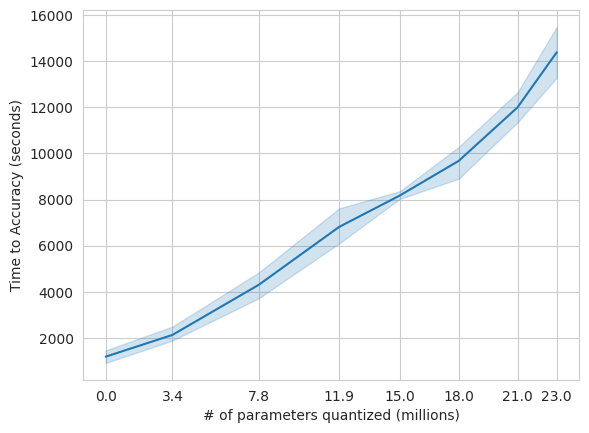

In [78]:
# Plotting
sns.set_style("whitegrid")
# sns.lineplot(data=df, x='no_parameters_quantized', y='V100_TTA', err_style='bars')
sns.lineplot(data=df, x='no_parameters_quantized', y='V100_TTA')

# plt.title('Time to Accuracy vs X_Size_Cum')
plt.xlabel('# of parameters quantized (millions)')
plt.ylabel('Time to Accuracy (seconds)')
plt.xticks([0, 3.4, 7.8, 11.9, 15, 18, 21, 23])

# plt.show()
plt.savefig("V100_TTA.png")

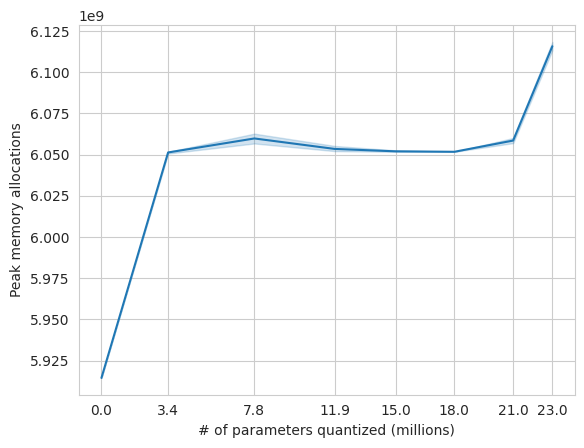

In [79]:
sns.lineplot(data=df, x='no_parameters_quantized', y='V100_TF_MEM')

# plt.title('Time to Accuracy vs X_Size_Cum')
plt.xlabel('# of parameters quantized (millions)')
plt.ylabel('Peak memory allocations')
plt.xticks([0, 3.4, 7.8, 11.9, 15, 18, 21, 23])

# plt.show()
plt.savefig("V100_TF_MEM.png")